In [1]:
import warnings
warnings.filterwarnings('ignore')


In [18]:
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
data = pd.read_csv(r"..\data\raw\train.csv",delimiter=',', encoding='ISO-8859-1')

In [6]:
data.head() 

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [7]:
# Selecting the Text and Sentiment for Analysis 
sent_data = data[['text', 'sentiment']]


In [8]:
sent_data

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [9]:
sent_data.info() #To get the idea about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


So there is 1 null data in the text column. After seeing it we can decide whether to drop it or not 

In [12]:
sent_data[sent_data['text'].isna()] # so maybe when nothing is said or NaN value we can consider a neutral gesture , but our algorithm expect some input so lets drop it 

,text,sentiment
314,NaN,neutral


In [13]:
sent_data.dropna(inplace=True)

In [14]:
sent_data.isna().sum() 

text         0
sentiment    0
dtype: int64

In [15]:
sent_data

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


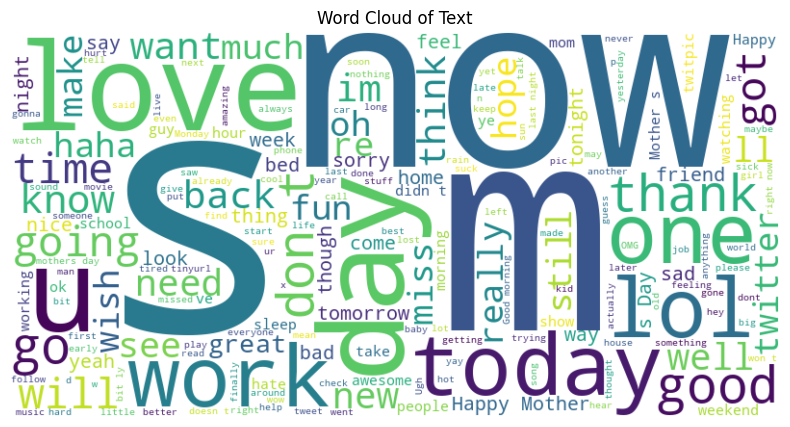

In [17]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sent_data['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()

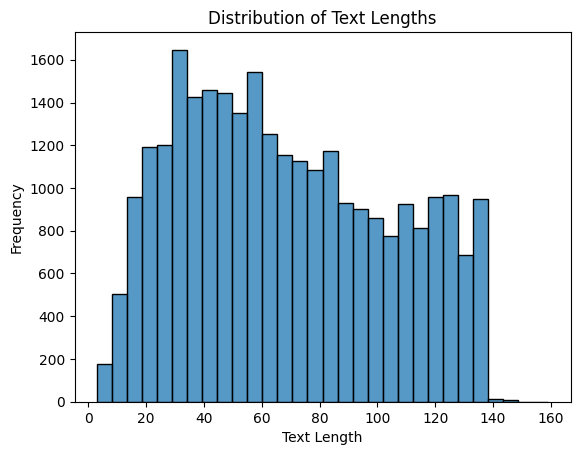

In [20]:
sent_data['text_length'] = sent_data['text'].apply(len)
sns.histplot(sent_data['text_length'], bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

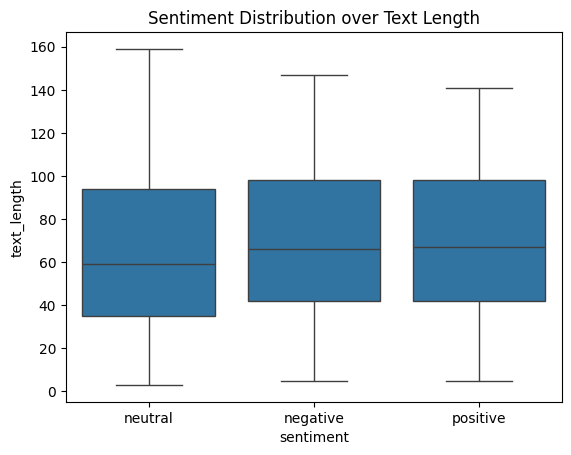

In [21]:
sns.boxplot(x='sentiment', y='text_length', data=sent_data)
plt.title('Sentiment Distribution over Text Length')
plt.show()